# Support Vector Machines

A method that builds on the linear regression we've seen so far is Support Vector Machines. This algorithm can be used for both classification and regression, but let's look at a regression example to understand how it works. Let's assume we have data with two classes:

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs

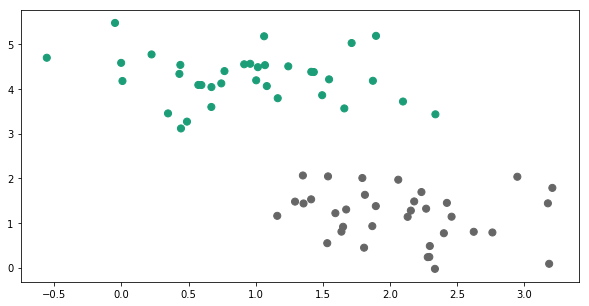

In [11]:
X, y = make_blobs(n_samples=70, centers=2, random_state=0, cluster_std=0.60)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2');

When fitting a linear model, there are many lines that separate our training data:

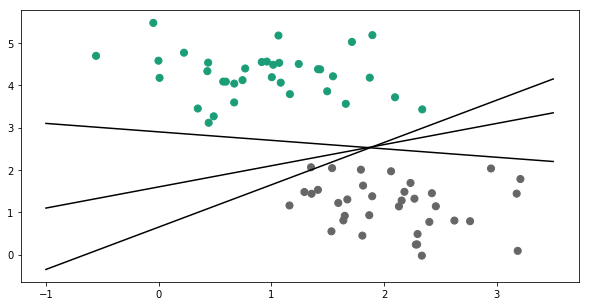

In [12]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

How can we make sure the line we have is the best one? To do so, we'll define an area around the line as the "margin"

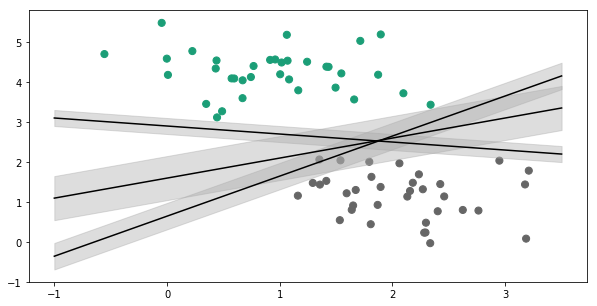

In [13]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

These vectors, or lines here, that define the edges of the margin are called "support vectors". The insight with SVM is that we can constrain our fitting method to have support vectors that are based on the data. For example, we can require that the support vector lines pass directly through at least one data point.

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X, y)
model.score(X, y)

1.0

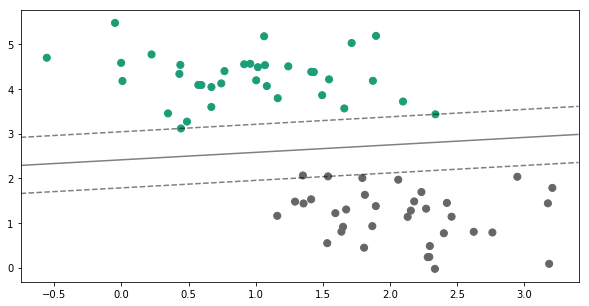

In [15]:
from figures.plot_svc import plot_svc_decision_function
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
plot_svc_decision_function(model);

Now we can be sure that the line we have is based on the data, and not just randomness from the fitting method. 

SVMs are often used with what's called a `kernel`, which is a transformation to our data which is useful when our data isn't linear. Let's look at some circular data:

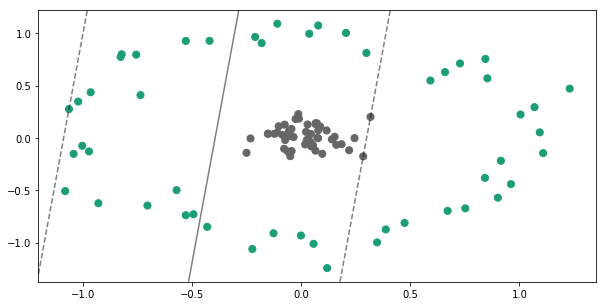

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

linear_clf = SVC(kernel='linear', C=100).fit(X, y)
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
plot_svc_decision_function(linear_clf, plot_support=False);

Let's apply a transformation to the data, using what's called the kernel trick. The first kernel we'll look at is called a "Radial Basis Function", "rbf", which is useful precisely for radial (ie circular) data

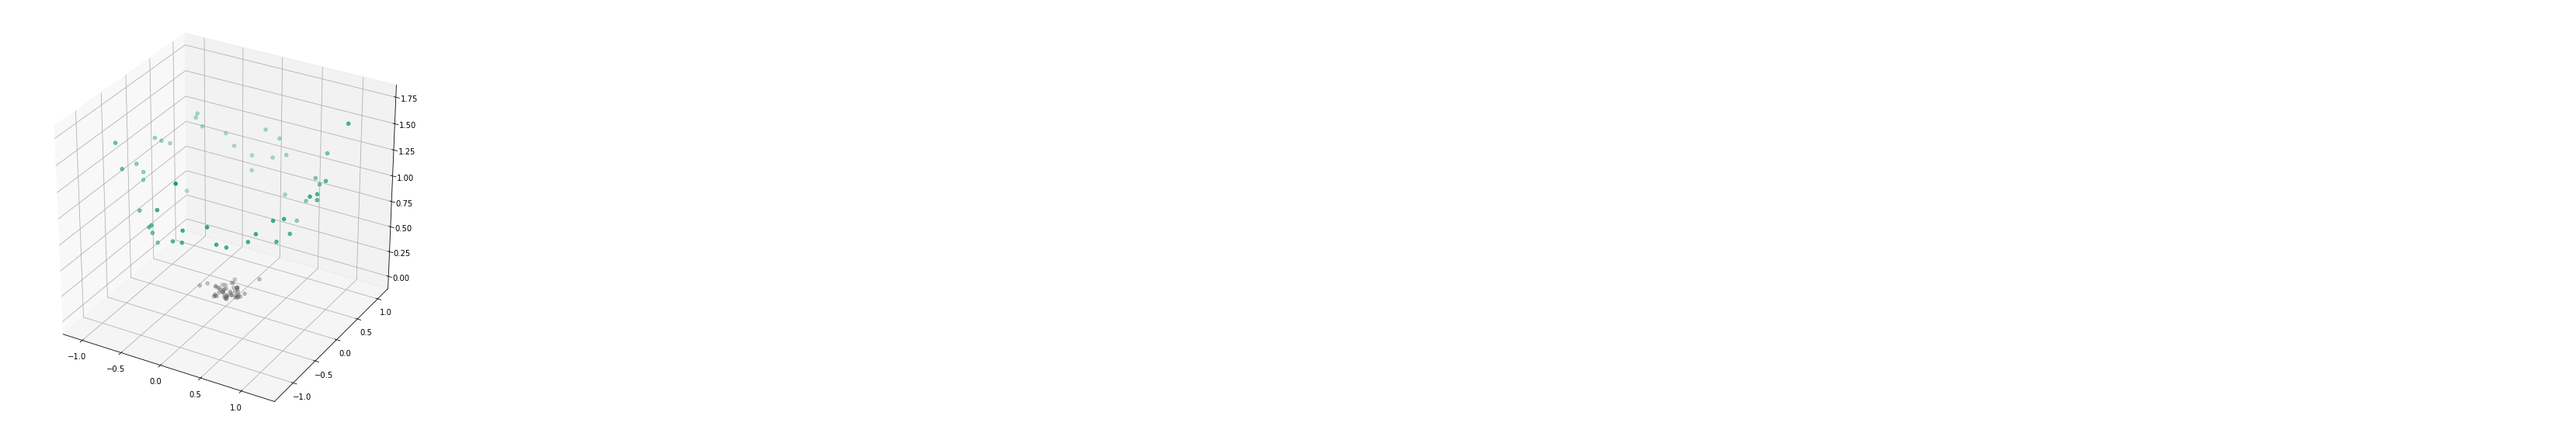

In [17]:
from mpl_toolkits.mplot3d import Axes3D
Z = X[:, 0]**2 + X[:, 1]**2
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], Z, c=y, cmap='Dark2');

The radial basis function is able to transform the data from circular into linear, which allows our linear classification method to find a minimum. Once the classifier is found, the same kernel can be used to transform the classifier to match the original data.

In [18]:
radial_clf = SVC(kernel='rbf', gamma='auto')
radial_clf.fit(X, y)
print('Linear: {}, radial: {}'.format(linear_clf.score(X, y), radial_clf.score(X, y)))

Linear: 0.68, radial: 1.0


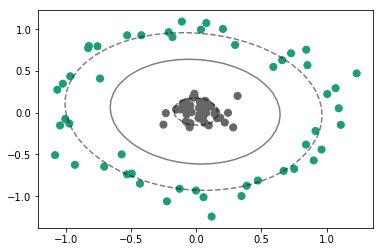

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
plot_svc_decision_function(radial_clf)
plt.scatter(radial_clf.support_vectors_[:, 0], radial_clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Kernels can be any transformation function. Let's look at multiplying our data by a matrix:

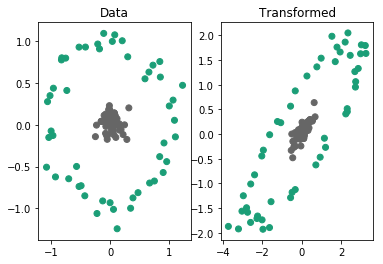

In [22]:
M = np.array([[0.1, 1.0], [3.0, 1.6]])
transformed = np.dot(X, M)
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2')
ax[0].set_title("Data")
ax[1].scatter(transformed[:, 0], transformed[:, 1], c=y, cmap='Dark2')
ax[1].set_title("Transformed");

In order to pass this to the SVM, we can provide the kernel as a function

In [26]:
def my_kernel(X, y):
    return np.dot(np.dot(X, M), y.T)
custom_clf = SVC(kernel=my_kernel)
custom_clf.fit(X, y)
print('Linear: {}, radial: {}, custom: {}'.format(linear_clf.score(X, y),
                                                  radial_clf.score(X, y), custom_clf.score(X, y)))

Linear: 0.68, radial: 1.0, custom: 0.48


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``03_svm_iris.py`` from the course website. Here there is a custom kernel called "my_kernel." Modify the values in the kernel, or define a new operation, to try to maximize the classification score. You can also try the 'linear', 'poly', and 'rbf' kernels for comparison. Modify C to also get a better classification score.
      </li>
    </ul>
</div>

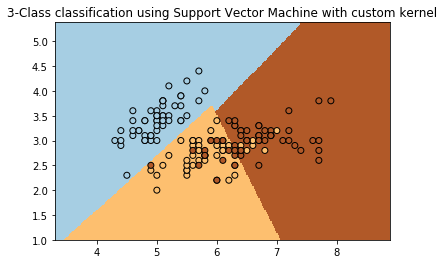

In [29]:
%load exercises/03_svm_iris.py

## Regression

Support vector machines can also easily be used for regression. The idea is similar: when fitting the line, use data points to determine the margins on the line. Kernels can also be used to transform the data to acheive a better fit.

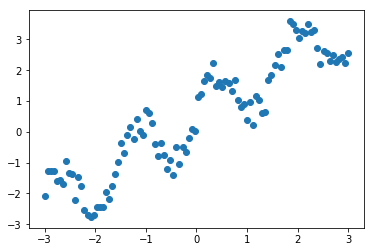

In [49]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
plt.scatter(X, y);

Let's fit many kernels to compare them:

In [57]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', gamma='auto')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', gamma='auto', degree=3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

print('RBF: {}, Linear: {}, Polynomial: {}'.format(svr_rbf.score(X, y), svr_lin.score(X, y), svr_poly.score(X, y)))

RBF: 0.9398049829716378, Linear: 0.8061369494697243, Polynomial: 0.5810335913570777


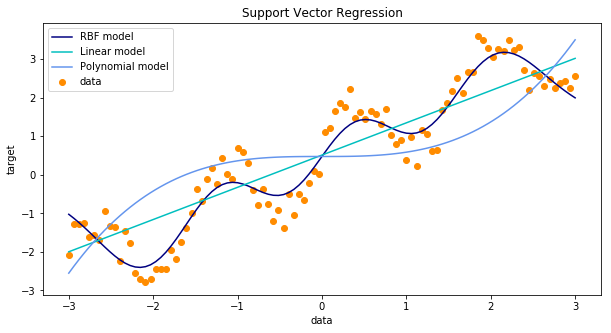

In [58]:
# Look at the results
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', label='RBF model')
plt.plot(X, y_lin, color='c', label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``03_svr_diabetes.py`` from the course website. None of the kernels seem to be classifying the data very well. Do you have any guesses why? Try to fix it so that you have better classification.
      </li>
    </ul>
</div>

In [61]:
# %load exercises/03_svr_diabetes.py